### Asset market equilibrium

In [1]:
import numpy as np
from scipy.optimize import fsolve

def equilibrium_eqns(x,gamma):
    # Define asset payoff in different states
    A11 = 1
    A12 = 1
    A13 = 1
    A14 = 1
    A21 = 1
    A22 = 1
    A23 = 1.5
    A24 = 1.5
    # Define each agent's endowment in each state at period 1
    e11 = 1
    e12 = 2
    e13 = 1
    e14 = 2
    e21 = 3
    e22 = 1
    e23 = 3
    e24 = 1
    
    # The 6 elements of array x are: agent 1's position for assets 1 and 2; agent 2's position for assets 1 and 2;
    # and prices for assets 1 and 2
    return np.array([1/4*((e11+x[0]*A11+x[1]*A21)**(-gamma)*A11 + 
                         (e12+x[0]*A12+x[1]*A22)**(-gamma)*A12 +
                         (e13+x[0]*A13+x[1]*A23)**(-gamma)*A13 +
                         (e14+x[0]*A14+x[1]*A24)**(-gamma)*A14) -
                         x[4]*(1-x[4]*x[0]-x[5]*x[1])**(-gamma),
                    1/4*((e11+x[0]*A11+x[1]*A21)**(-gamma)*A21 + 
                         (e12+x[0]*A12+x[1]*A22)**(-gamma)*A22 +
                         (e13+x[0]*A13+x[1]*A23)**(-gamma)*A23 +
                         (e14+x[0]*A14+x[1]*A24)**(-gamma)*A24) -
                         x[5]*(1-x[4]*x[0]-x[5]*x[1])**(-gamma),
                    1/4*((e21+x[2]*A11+x[3]*A21)**(-gamma)*A11 + 
                         (e22+x[2]*A12+x[3]*A22)**(-gamma)*A12 +
                         (e23+x[2]*A13+x[3]*A23)**(-gamma)*A13 +
                         (e24+x[2]*A14+x[3]*A24)**(-gamma)*A14) -
                         x[4]*(1-x[4]*x[2]-x[5]*x[3])**(-gamma),
                    1/4*((e21+x[2]*A11+x[3]*A21)**(-gamma)*A21 + 
                         (e22+x[2]*A12+x[3]*A22)**(-gamma)*A22 +
                         (e23+x[2]*A13+x[3]*A23)**(-gamma)*A23 +
                         (e24+x[2]*A14+x[3]*A24)**(-gamma)*A24) -
                         x[5]*(1-x[4]*x[2]-x[5]*x[3])**(-gamma),
                    x[0]+x[2],
                    x[1]+x[3]])

sol = np.zeros((4,6))
sol[0,:] = fsolve(equilibrium_eqns,[0.,0.,0.,0.,0.,0.],args=2)
sol[1,:] = fsolve(equilibrium_eqns,[0.,0.,0.,0.,0.,0.],args=4)
sol[2,:] = fsolve(equilibrium_eqns,[0.,0.,0.,0.,0.,0.],args=8)
sol[3,:] = fsolve(equilibrium_eqns,[0.,0.,0.,0.,0.,0.],args=166)

niter = 0
for param in [2,4,6,166]:
    print("gamma = %3d: Agent 1 buys %1.4f units of asset 1 and %1.4f units of asset 2. Price for asset 1 is %1.4f, and price for asset 2 is %1.4f" %(param,sol[niter,0],sol[niter,1],sol[niter,4],sol[niter,5]))
    niter = niter + 1

gamma =   2: Agent 1 buys 0.0195 units of asset 1 and -0.0000 units of asset 2. Price for asset 1 is 0.5898, and price for asset 2 is 0.7372
gamma =   4: Agent 1 buys 0.0040 units of asset 1 and 0.0000 units of asset 2. Price for asset 1 is 0.5187, and price for asset 2 is 0.6483
gamma =   6: Agent 1 buys 0.0002 units of asset 1 and 0.0000 units of asset 2. Price for asset 1 is 0.5010, and price for asset 2 is 0.6263
gamma = 166: Agent 1 buys 0.0000 units of asset 1 and -0.0000 units of asset 2. Price for asset 1 is 0.5000, and price for asset 2 is 0.6250


### Ramsey

1.0832478088006379
0.0032845620332686565
1.6927894375129426e-05


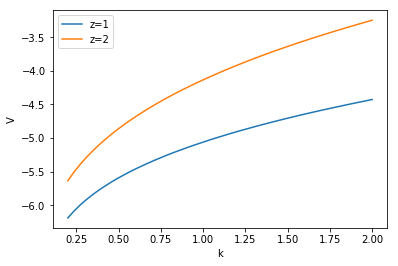

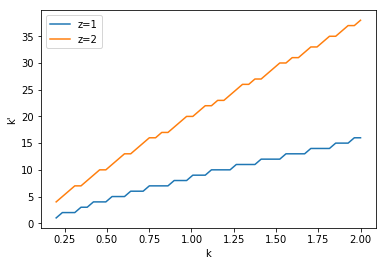

In [3]:
import numpy as np
from matplotlib import pyplot as plt

bbeta = 0.9
v = lambda c: np.log(c)
nk = 50
nz = 2
tol = 1e-6
maxDiff = np.inf
kgrid = np.linspace(0.2,2.0,nk)
zTransition = 0.5*np.ones((nz,1))
V = np.zeros((nk*nz,1))
tempV = np.zeros((nk*nz,1))
gk = np.zeros((nk*nz,1))

niter = 1
while maxDiff > tol:
    Vm = np.reshape(V,(-1,nk)).T
    VnextExp = Vm @ zTransition  
                              
    for i in range(nk*nz):
        ik = int(np.floor(np.mod(i,nk)))
        iz = int(np.mod(np.floor((i)/nk),nz))
        vv = -np.inf
        
        k = kgrid[ik]
        if iz == 0:
            f_k = 0.9*k**0.3 + 0.3*k
        else:
            f_k = 1.1*k**0.3 + 0.9*k
                      
        for ikp in range(nk):
            kp = kgrid[ikp]
            c = f_k - kp
            
            if c <= 0:
                break
           
            value = v(c) + bbeta*VnextExp[ikp]
                
            if value > vv:
                vv = value
                kChoice = ikp
                
        tempV[i] = vv
        gk[i] = kChoice
    
    maxDiff = np.max(np.abs(V-tempV))
    V = np.copy(tempV)    
    
    if niter == 1 or np.mod(niter,50) == 0:
        print(maxDiff)
        
    niter = niter + 1

# Plot value functions
f1,ax1 = plt.subplots()
ax1.plot(kgrid,V[0:nk],label='z=1')
ax1.plot(kgrid,V[nk:],label='z=2')
ax1.legend()
ax1.set_xlabel('k')
ax1.set_ylabel('V')

# Plot capital policy functions
f2,ax2 = plt.subplots()
ax2.plot(kgrid,gk[0:nk],label='z=1')
ax2.plot(kgrid,gk[nk:],label='z=2')
ax2.legend()
ax2.set_xlabel('k')
ax2.set_ylabel("k'")
plt.show()

### Projection Methods for Ramsey Model

#### Approximate capital policy function using piecewise linear function

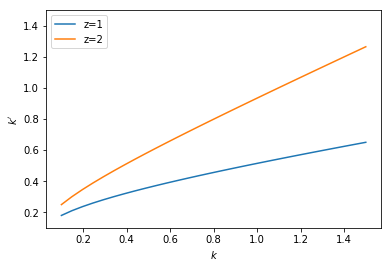

In [4]:
from scipy.interpolate import interp1d
from scipy.optimize import fsolve, root
from matplotlib import pyplot as plt
import numpy.polynomial.chebyshev as cheb
import numpy as np

# Production function
# z: aggregate state (TFP), k: current capital
def f(z,k):
    if z == 1:
        return 0.9*k**0.3 + 0.3*k
    else:
        return 1.1*k**0.3 + 0.9*k

# Derivative of production function
def fp(z,k):
    if z == 1:
        return 0.27*k**(-0.7) + 0.3
    else:
        return 0.33*k**(-0.7) + 0.9

# Residual function evaluated at k=x
# kp: capital policy function (nk*nz)
def R(x,z,beta,k,kp,kgrid):
    lhs = 1 / (f(z,k)-x)
    L1 = interp1d(kgrid,kp[:,0])
    L2 = interp1d(kgrid,kp[:,1])
    rhs = beta * 0.5*(fp(1,x)/(f(1,x)-L1(x)) + fp(2,x)/(f(2,x)-L2(x)))
    return abs(lhs-rhs)                 

nk = 30                             # number of capital grid points
kmin = 0.1                          # minimum capital
kmax = 1.5                          # maximum capital
kgrid = np.linspace(kmin,kmax,nk)
tol = 1e-5                          # tolerance level for error
gk = np.zeros((nk,2))               # capital policy function
maxDiff = np.inf
beta = 0.9

# Main step: find capital policy that satisfies the Euler equation
while maxDiff > tol:
    gkTemp = np.zeros((nk,2))       # capital policy in the next iteration
    residuals = np.zeros((nk,2))
    for ik in range(nk):
        for iz in range(2):
            k = kgrid[ik]
            z = iz + 1
            ksol = fsolve(R,0.1,args=(z,beta,k,gk,kgrid))
            gkTemp[ik,iz] = ksol
    
    for ik in range(nk):
        for iz in range(2):
            k = kgrid[ik]
            z = iz + 1
            residuals[ik,iz] = R(gkTemp[ik,iz],z,beta,k,gkTemp,kgrid)
            
    maxDiff = abs(residuals).max()
    gk = np.copy(gkTemp)

# Plot the policy functions
plt.plot(kgrid,gk[:,0],label='z=1')
plt.plot(kgrid,gk[:,1],label='z=2')
plt.ylim([min(kgrid),max(kgrid)])
plt.xlabel(r"$k$")
plt.ylabel(r"$k'$")
plt.legend()
plt.show()

#### Approximate capital policy function using Chebyshev polynomial and collocation points

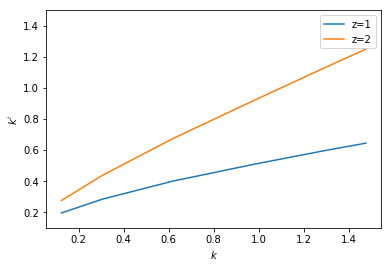

In [6]:
def R_chebyshev(x,n,beta,kgrid,kmin,kmax):
    res = np.zeros((n*2,1))                      # residuals of Euler equations evaluated at grid points
    coeff = np.zeros((2,n))                      # coefficients of Chebyshev polynomials
    coeff[0,:] = x[0:n]
    coeff[1,:] = x[n:]
    
    # Create Chebyshev basis functions
    z = -np.cos((2*(np.linspace(1,n,n))-1)/(2*n)*np.pi)  # Chebyshev zeros in [-1,1]
    T_k = np.ones((n,n))                                 # columns are polynomials of different degrees
    T_k[:,1] = z
    for i in range(2,n):
        T_k[:,i] = 2*z*T_k[:,i-1] - T_k[:,i-2]
    
    lhs = np.zeros((2*n,))
    rhs = np.zeros((2*n,))
    
    # Iterate over the two aggregate states
    for iz in range(2):
        gk = np.zeros((n,1))                             # capital policy function at current z
        
        # Iterate over capital in this period
        for ik in range(n):
            k = kgrid[ik]
            kp = coeff[iz,:].dot(T_k[ik,:])
            
            # Make sure capital next period is in the [kmin,kmax] range, and consumption > 0
            kp = max(kp,kmin+0.01)
            kp = min(kp,kmax-0.01,f(iz+1,k)-0.01)            
            gk[ik] = kp
        
        gk_scaled = (2*gk-(kmin+kmax))/(kmax-kmin)      # rescale capital policy to the [-1,1] range
        
        # Create Chebyshev basis functions evaluated at capital in the next period
        T_g_k = np.ones((n,n))
        T_g_k[:,[1]] = gk_scaled
        for i in range(2,n):
            T_g_k[:,[i]] = 2*gk_scaled*T_g_k[:,[i-1]] - T_g_k[:,[i-2]]
        
        # Iterate over capital in this period
        for ik in range(n):
            k = kgrid[ik]
            kpp = np.zeros((2,1))                      # capital two periods later
            
            # Iterate over aggregate states in the next period
            for izp in range(2):              
                kpp[izp] = coeff[izp,:].dot(T_g_k[ik,:])
                
                # Make sure capital two periods later is also in [kmin,kmax], and consumption in the next period > 0
                kpp[izp] = max(kpp[izp],kmin+0.01)
                kpp[izp] = min(kpp[izp],kmax-0.01,f(izp+1,gk[ik])-0.01)
            
            lhs[iz*n+ik] = 1 / (f(iz+1,k)-gk[ik])      # left hand side of the Euler equation
            rhs[iz*n+ik] = beta * 0.5 * (fp(1,gk[ik])/(f(1,gk[ik])-kpp[0]) + fp(2,gk[ik])/(f(2,gk[ik])-kpp[1]))
                                                       # right hand side of the Euler equation
            
    res = abs(lhs - rhs)
    return res

###################################################
maxDiff = np.inf
n_list = np.array((3,4,5,6))                           # gradually increase the degree of Chebyshev polynomials (otherwise hard to converge)
n = min(n_list)
coeff = np.vstack((np.array((0.3)),np.zeros((n-1,1)),np.array((0.8)),np.zeros((n-1,1))))
                                                       # coefficients of the Chebyshev polynomials (coefficient of the constant term should be close to steady state capital)
for n in n_list:
    z = -np.cos((2*(np.linspace(1,n,n))-1)/(2*n)*np.pi)   # Chebyshev zeros
    kgrid_colloc = kmin + (z+1)*(kmax-kmin)/2             # capital grid
    
    if n > min(n_list):
        coeff = np.vstack((np.array((0.3)),np.zeros((n-1,1)),np.array((0.8)),np.zeros((n-1,1))))
        coeff[0:nOld] = coeff_sol[0:nOld].reshape(nOld,1)
        coeff[n:n+nOld] = coeff_sol[nOld:].reshape(nOld,1)
    
    # Solve for the coefficients
    while maxDiff > tol:
        coeff_sol = fsolve(R_chebyshev,coeff,args=(n,beta,kgrid_colloc,kmin,kmax))
        residuals = R_chebyshev(coeff_sol,n,beta,kgrid_colloc,kmin,kmax)
        maxDiff = residuals.max()
        
    maxDiff = np.inf
    nOld = n

# Recover policy functions from the coefficients
T_k = np.ones((n,n))
z = -np.cos((2*(np.linspace(1,n,n))-1)/(2*n)*np.pi)
kgrid_colloc = kmin + (z+1)*(kmax-kmin)/2
T_k[:,1] = z
for i in range(2,n):
    T_k[:,i] = 2*z*T_k[:,i-1] - T_k[:,i-2]

gk = np.zeros((n,2))                                       # capital policy function
for iz in range(2):    
    for ik in range(n):
        k = kgrid[ik]
        kp = coeff[iz*n:(iz+1)*n].T.dot(T_k[ik,:])
        gk[ik,iz] = kp

# Plot the results
plt.plot(kgrid_colloc,gk[:,0],label='z=1')
plt.plot(kgrid_colloc,gk[:,1],label='z=2')
plt.ylim([min(kgrid),max(kgrid)])
plt.xlabel(r"$k$")
plt.ylabel(r"$k'$")
plt.legend()
plt.show()

#### AR(1) shocks

Converged after iteration 11


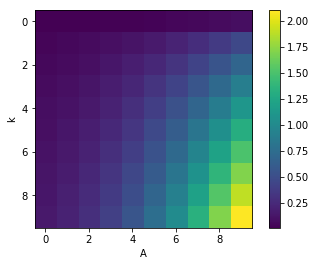

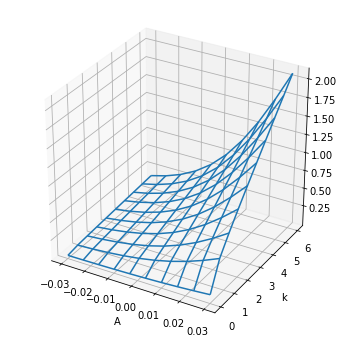

In [7]:
from scipy.interpolate import interp2d
from collections import OrderedDict
import collections
import itertools
from itertools import islice
from numpy.polynomial import chebyshev
from scipy.interpolate import splev, splrep
from mpl_toolkits.mplot3d import Axes3D

import scipy.optimize as opt
N_k = 10 # number of grid-points for the capital grid
k_low = 0.01 # lower bound for the capital grid
k_high = 6 # upper bound for capital grid
k_grid = np.linspace(k_low, k_high, N_k) #grid for capital

N_A = 10
A_low = -0.01 * 3
A_high = 0.01 * 3
A_grid = np.linspace(A_low, A_high, N_A)

def u_prime(c):
    return 1/c

def f(k, A):
    return np.exp(A) * k ** 0.3 + 0.5 * k

def f_prime(k, A):
    return 0.3 * np.exp(A) * k ** (-0.7) + 0.5

def mid_int(g, a, b, N):
    
    int_sum = 0
    for i in range(N):
        x_i = a + (2*i+1)*(b-a)/(2*N)
        int_sum += g(x_i)
    mid_int = (b-a)/N * int_sum
    return mid_int

def normal_pdf(A_prime, mu, sigma):
    return 1 / np.sqrt(2*np.pi*sigma**2) * np.exp(-(A_prime-mu)/(2*sigma**2))

def euler_equation(params, args):
    k1 = params
    beta, k0, A, k_interp = args
    integrand = lambda A_prime: u_prime(f(k1, A_prime)-k_interp(k1, A_prime)) * f_prime(k1, A_prime)*normal_pdf(A_prime, 0.9*A, 0.1)
    integral = mid_int(integrand, \
            A_low, A_high, 20)
    equ = beta * integral \
            - u_prime(f(k0, A) - k1)
    
    return equ

def solve_policy_func(interp_type, plot=True):
    
    PF_iter = 0
    PF_maxiter = 200
    PF_dist = 10
    PF_mindist = 1e-8

    grid_new = np.ones((N_k, N_A)) * k_low
    beta = 0.9

    while (PF_iter < PF_maxiter) and (PF_dist > PF_mindist):

        PF_iter += 1
        grid_init = grid_new.copy()
        
        grid_interp = interp2d(k_grid, A_grid, grid_init, kind=interp_type)
        
        print(grid_interp)
        for k_ind in range(N_k):
            for A_ind in range(N_A):
            
                k = k_grid[k_ind]
                A = A_grid[A_ind]
                params_init = k_low # guess for k1
                
                #lambda kprime : euler_equation(kprime, beta, k, A, grid_interp)
                args = np.array([beta, k, A, grid_interp])
                
                #k1, infodict, ier, mesg = opt.fsolve(local_euler, params_init, full_output = True)
                k1, infodict, ier, mesg = opt.fsolve(euler_equation, params_init, args, full_output = True)
                if not ier == 1:
                    print(mesg)
                    print(infodict)
                assert ier == 1, 'Solver not succesfull'
                grid_new[k_ind, A_ind] = k1

        PF_dist = np.amax(abs(grid_init - grid_new))
        #print('PF_iter=', PF_iter, ', PF_dist=', PF_dist) 
    
    print('Converged after iteration {}'.format(PF_iter))
    #return grid_new
    
    if plot == True:
        plt.imshow(grid_new)
        plt.colorbar()
        plt.xlabel('A')
        plt.ylabel('k')
        plt.show()
        
        fig = plt.figure(figsize=(6,6))
        ax = fig.gca(projection='3d')
        X, Y = np.meshgrid(A_grid, k_grid)
        surf = ax.plot_wireframe(X, Y, grid_new)
        ax.set_xlabel('A')
        ax.set_ylabel('k')
        
solve_policy_func('linear', plot=True)